In [2]:
import glob
import os
import re

import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision.transforms.v2 import functional

In [ ]:
WELL_DIR_PATTERN_TRAIN = re.compile(
    r"^(?P<well_id>[0-9a-fA-F]+)_(?P<atp>\d+)_(?P<conc>[A-Za-z]+)_(?P<date>\d+)$"
)
WELL_DIR_PATTERN_TEST = re.compile(
    r"^(?P<well_id>[0-9a-fA-F]+)_(?P<conc>[A-Za-z]+)_(?P<date>\d+)$"
)

train_dir = "DATASET/train"  # Replace with actual path
test_dir = "DATASET/test"  # Replace with actual path


def get_well_directories(data_dir: str, pattern: re.Pattern):
    """Get all well directories with their metadata."""
    wells = []

    # Iterate through patient directories (CGR/PGR)
    for patient_id in os.listdir(data_dir):
        # print(patient_id)
        patient_path = os.path.join(data_dir, patient_id)
        if not os.path.isdir(patient_path):
            continue

        # Iterate through well directories
        for well_dir_name in os.listdir(patient_path):
            # print(well_dir_name)
            well_path = os.path.join(patient_path, well_dir_name)
            if not os.path.isdir(well_path):
                continue
            print(well_dir_name)
            match = pattern.match(well_dir_name)
            if match:
                print('aaaa')
                # Count TIFF files (cavity videos) in this well
                tif_files = glob.glob(os.path.join(well_path, "*.tif"))
                for tif_file in tif_files:

                    well = {
                        "patient_id": patient_id,
                        "well_id": match.group("well_id"),
                        "concentration": match.group("conc"),
                        "date": int(match.group("date")),
                        "tif_path": os.path.abspath(tif_file),
                    }

                    if "atp" in match.groupdict():
                        well["atp"] = int(match.group("atp"))
                    wells.append(well)

    return wells


# Load train wells
train_videos = get_well_directories(train_dir, pattern=WELL_DIR_PATTERN_TRAIN)
test_videos = get_well_directories(test_dir, pattern=WELL_DIR_PATTERN_TEST)
print(f"Found {len(train_videos)} videos in train set")
print(f"Found {len(test_videos)}  videos in test set")
print("Total videos:", len(train_videos) + len(test_videos))



00dd51b167df88690e8277b5b81b44c8_1162600_high_120923
aaaa
12f27a98966391e2429498193d5b887f_2336147_low_070923
aaaa
14b9e5f367784f2e17efb610e17039ab_1476490_med_101023
aaaa
15f1e3331396f39d90013d2d446739b2_1029165_high_101023
aaaa
17fc78acc79c93f00a930e1485b9cab4_1874302_med_070923
aaaa
19e8b717b13d49826483ff52e2246858_1162600_high_070923
aaaa
1c019a33535bedfffc855f202f4adb49_1799590_med_120923
aaaa
2c5391cb9778935262af5f1df5adc4ba_1130563_high_120923
aaaa
2ca1c298261c69f3a5a216f4f2786b36_1874302_med_120923
aaaa
3d322b27df3da7c1420c0bae1ce71fe5_2394230_ctrl_070923
aaaa
3dfc2db83951f64ac9845177c24f61e1_1476179_med_101023
aaaa
43b865fc25eef7b7fd6a5bfd0e109e12_2147408_low_210923
aaaa
48009a55020b8b662dcc3d6848f31349_1396075_med_210923
aaaa
49d908b32ef402243d7e57fb9ddfce9a_2107833_low_210923
aaaa
4ad8a91e34e959159d910416317dd8ab_2439199_low_070923
aaaa
4aec7d84b977ce7056bca038d7ccb895_2002634_low_101023
aaaa
625ccfca7ead06886f2746b07135dde2_2141879_low_210923
aaaa
657e00f41cf9a16ebbdefd4f05

In [4]:

def load_video_frames(path: str, img_size: int = 224) -> torch.Tensor:
    img = Image.open(path)
    frames = []
    for i in range(img.n_frames):
        img.seek(i)
        frame = functional.to_image(img)
        frames.append(frame)
    
    x = torch.concat(frames)

    # Resize frames to a common size (e.g., 224x224)
    # Needed to ensure all frames have the same dimensions for batching
    x = functional.resize(x, (img_size, img_size))

    return x


n = 10
x = load_video_frames(train_videos[n]["tif_path"])

IndexError: list index out of range

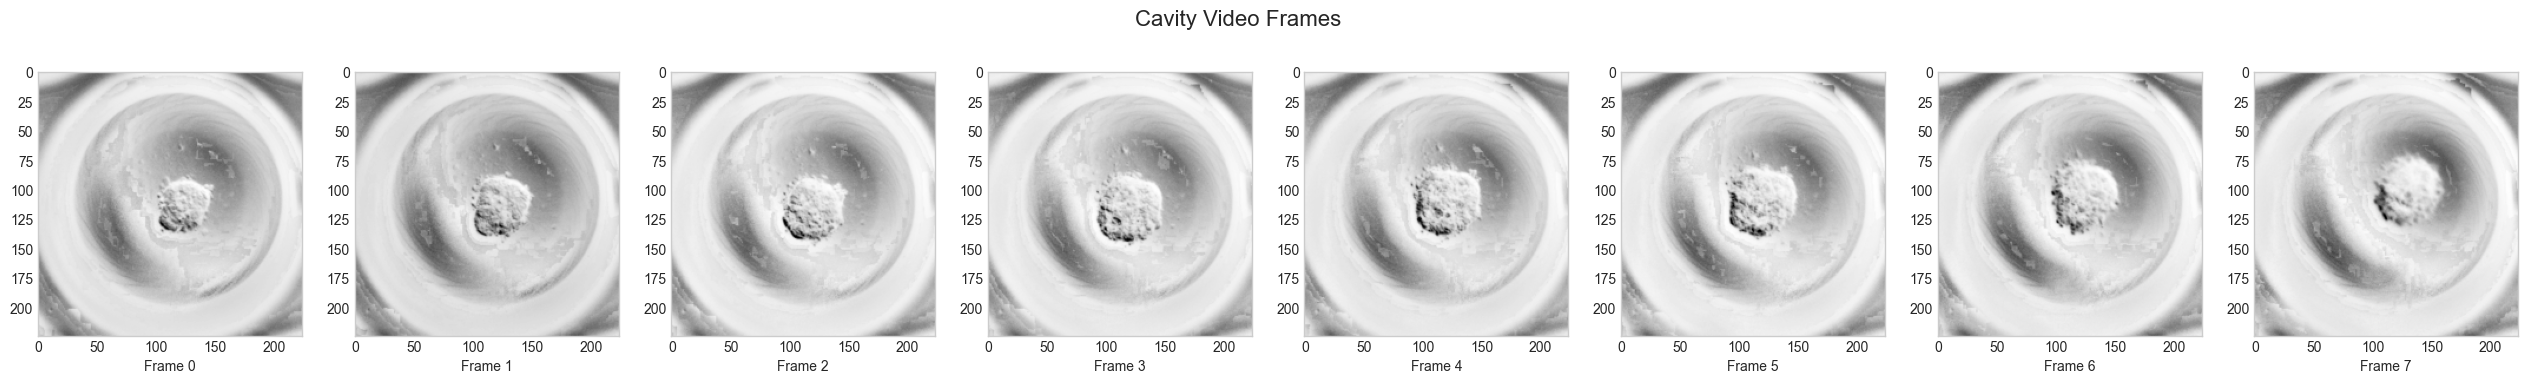

In [45]:
def show_well_video(x: torch.Tensor):
    n_frames = x.shape[0]
    plt.figure(figsize=(4* n_frames, 4))
    for i in range(n_frames):
        plt.subplot(1, n_frames, i + 1)
        plt.imshow(x[i])
        plt.xlabel(f"Frame {i}") 
        plt.grid(False)
    plt.suptitle("Cavity Video Frames", fontsize=16)
    plt.show()
show_well_video(x)